In [166]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)

In [167]:
df1= pd.read_csv("bengaluru_house_prices.csv")

In [168]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [169]:
df1.shape

(13320, 9)

In [170]:
df2 = df1.drop(['area_type','availability','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [171]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [172]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [173]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [174]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\avani\AppData\Local\Temp\ipykernel_25076\3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [175]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [176]:
df3.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [177]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [178]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [179]:
def convert_sqft_to_num(x):
    try:
        # Handle values like "2100 - 2850" or "2100 2850"
        if isinstance(x, str):
            x = x.strip()
            if '-' in x:
                tokens = x.split('-')
                if len(tokens) == 2:
                    return (float(tokens[0]) + float(tokens[1])) / 2
            elif ' ' in x:
                tokens = x.split()
                if len(tokens) == 2:
                    return (float(tokens[0]) + float(tokens[1])) / 2
        # Handle normal floatable values like "1200"
        return float(x)
    except:
        return None
#data cleaning for total_sqft is done till here 

In [180]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [181]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [182]:
len(df5.location.unique())

1265

In [183]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [184]:
len(location_stats[location_stats<=10])

1017

In [185]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [186]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)
len(df5.location.unique())

238

In [187]:
df5.head(20)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [188]:
df5[(df5.total_sqft/df5.bhk)<150].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,0.0,115.0,7,12105.263158
176,Kumaraswami Layout,5 Bedroom,600.0,3.0,2.0,85.0,5,14166.666667
349,other,3 Bedroom,11.0,3.0,2.0,74.0,3,672727.272727


In [189]:
df5.shape

(12710, 8)

Neglecting total sqft per bedroom less than 300 

In [190]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12055, 8)

In [191]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

Removing outliers from price sqft

In [192]:
def remove_outlier_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7= remove_outlier_price_per_sqft(df6)
df7.shape

(9848, 8)

In [193]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


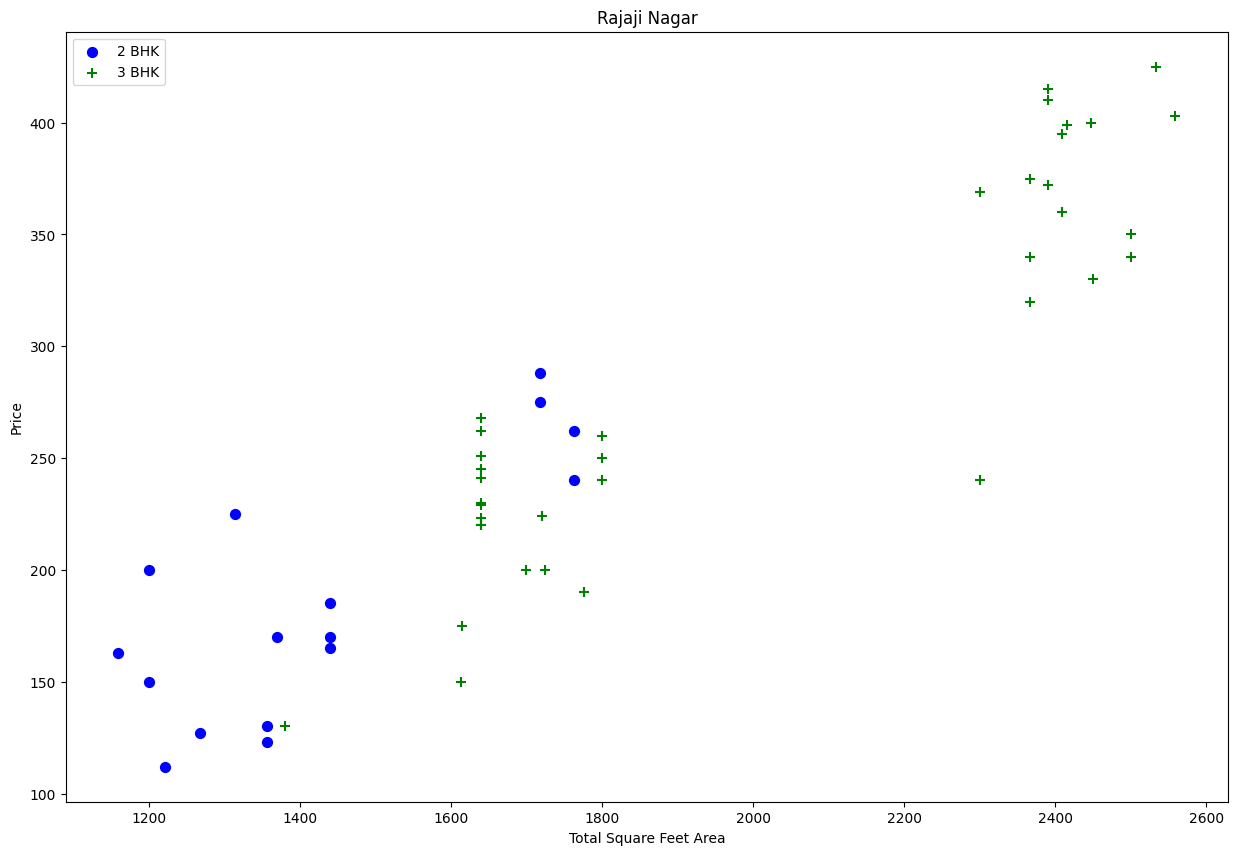

In [194]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk ==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color ='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

Removing no of bedrooms(bhk) outliers

In [195]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] ={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7025, 8)

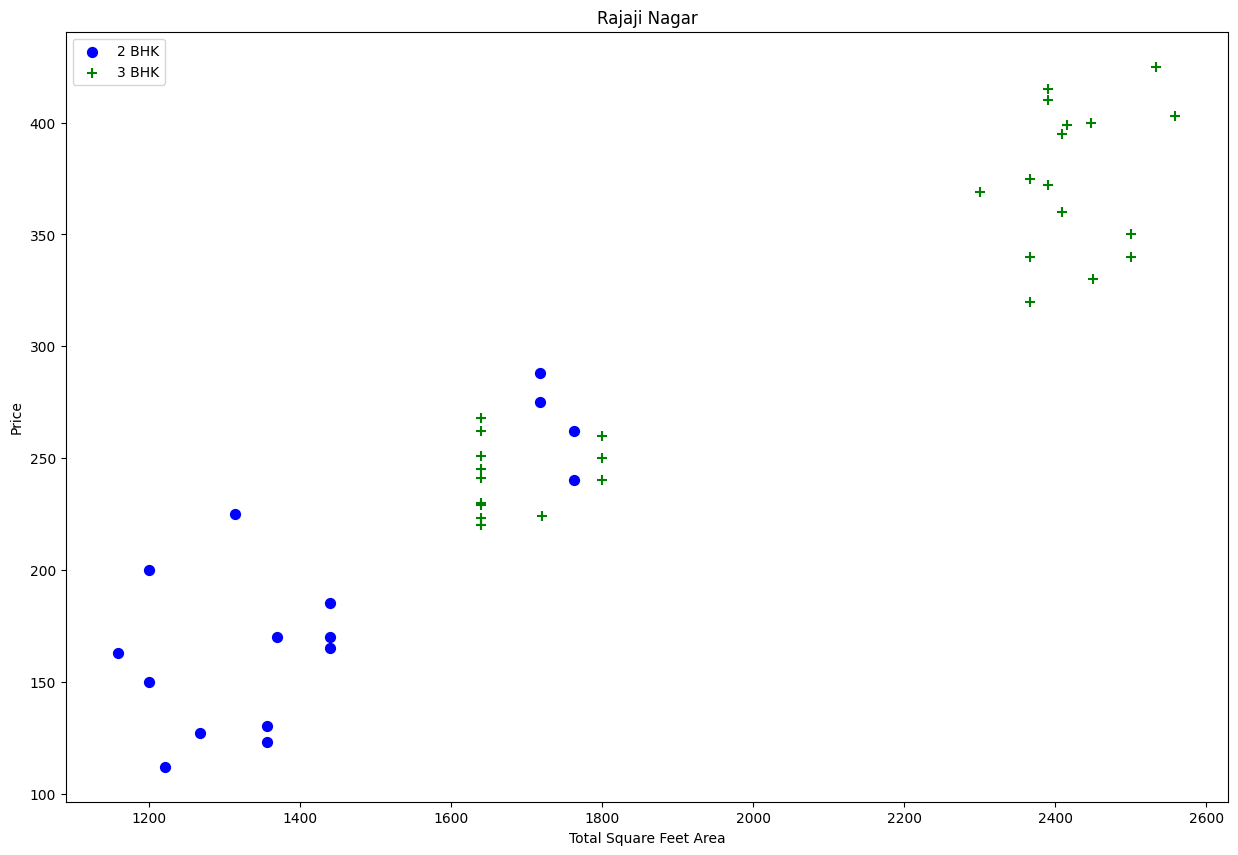

In [196]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

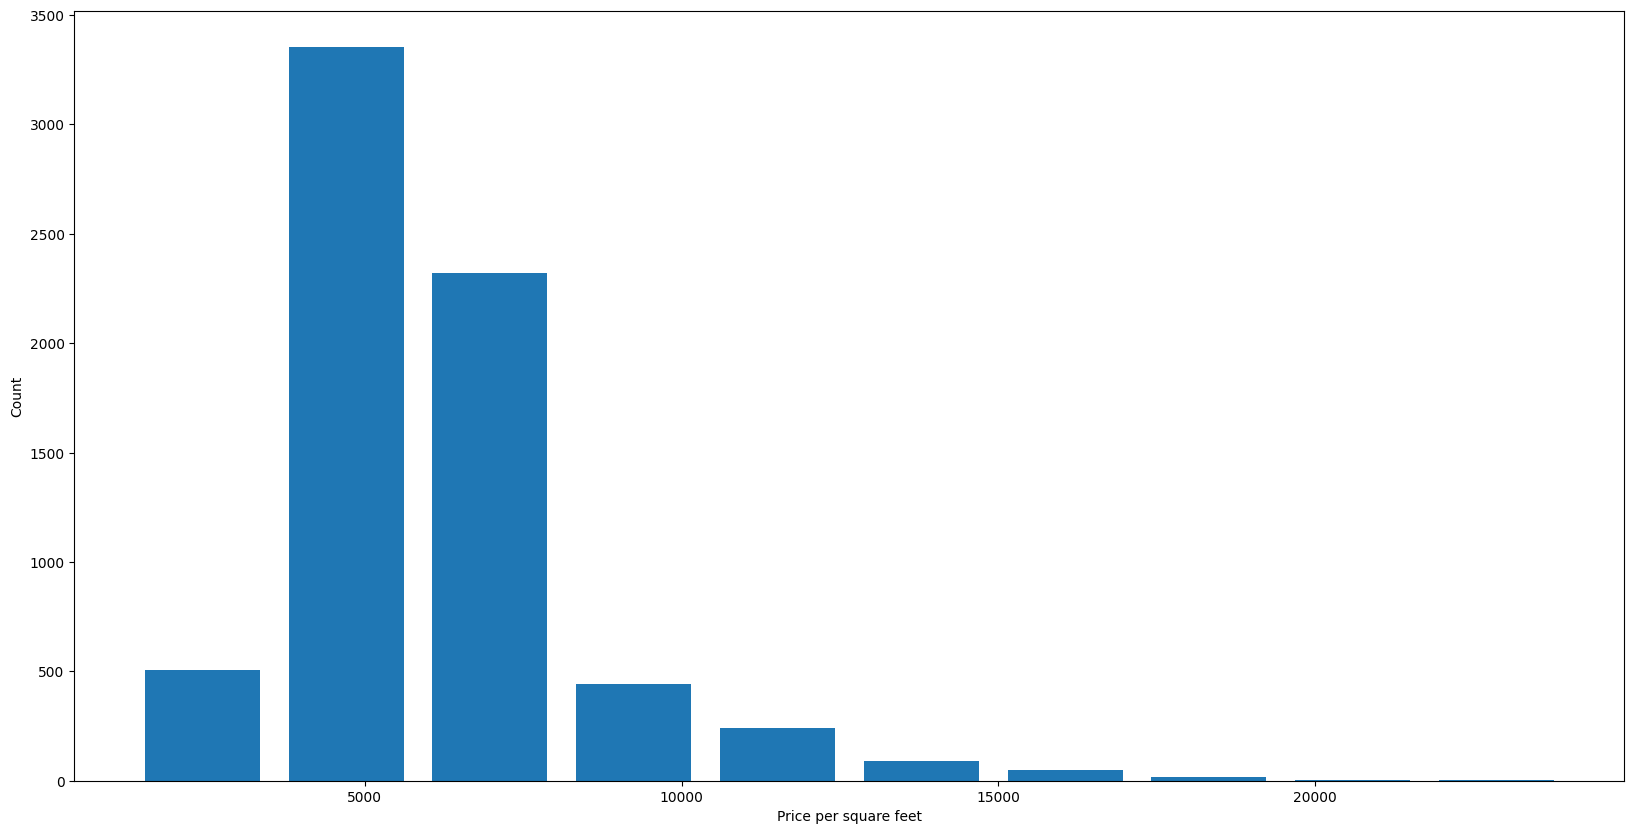

In [197]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [198]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [199]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [200]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


It is unusal to have a house with the number of bathrooms is more than 2 greater than the number of bedrooms (BHK). Hence removing such instances.

In [201]:
df9 = df8[df8.bath<df8.bhk+2]

In [202]:
df9.shape

(6958, 8)

Since we have a cleaned column for 'size' as 'bhk' and 'price_per_sqft' is also of no use in model further hence droping both the columns.

In [203]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


Creating One Hot Encoding for 'location' non numeric feature.

In [204]:
dummies =pd.get_dummies(df10.location)

In [205]:
df11= pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [206]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [207]:
df12.shape

(6958, 242)

Preparing data for machine learning model.

In [208]:
X= df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [209]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [210]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [211]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.858458798623512

In [212]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on test set
y_pred = model.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 26.73025737118029


In [213]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv =ShuffleSplit(n_splits=5, test_size=0.2,random_state=1)
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), X, y,cv=cv)

array([0.86752772, 0.83882125, 0.83335039, 0.78375025, 0.85458174])

The above code helped to randomly split the dataset into test and training set.

In [214]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('lr', LinearRegression())
            ]),
            'params': {
                'lr__fit_intercept': [True, False],
                'lr__positive': [True, False]
            }
        },
        'lasso': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('lasso', Lasso())
            ]),
            'params': {
                'lasso__alpha': [1, 2],
                'lasso__selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


The above function helps identify the best regression model for a given dataset by testing multiple algorithms like Linear Regression, Lasso, and Decision Tree with different parameter settings. It uses cross-validation to evaluate each model and returns a summary of the best-performing model and its parameters.

In [ ]:
find_best_model(X,y)

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index]=1
    return model.predict(pd.DataFrame([x], columns=X.columns))[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000,2,2)

In [ ]:
predict_price('1st Phase JP Nagar',1000,2,3)